In [22]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import joblib
import warnings
warnings.filterwarnings('ignore')

In [23]:
#load dataset
df = pd.read_csv('loan_approval.csv')
df.columns = df.columns.str.strip().str.lower()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip()
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [25]:

# remove extra spaces from column names
df.columns = df.columns.str.strip()
# check data info and missing values
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nTarget Distribution:\n", df['loan_status'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
None

Missing Values:
 loan_id

In [26]:
# handle missing values
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [27]:
# encode categorical variables
label_encoders = {}
categorical_features = ['education', 'self_employed']
for col in categorical_features:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
        print(f"Encoded {col}: {le.classes_}")

Encoded education: ['Graduate' 'Not Graduate']
Encoded self_employed: ['No' 'Yes']


In [28]:
#encode target variable
le_target = LabelEncoder()
df['loan_status'] = le_target.fit_transform(df['loan_status'])

In [29]:
#prepare features and target
df = df.drop('loan_id', axis=1)
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [30]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [31]:
#apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [32]:
#train Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_balanced, y_train_balanced)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [33]:
#train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train_balanced, y_train_balanced)


,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [34]:
# evaluate Logistic Regression
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Results:
Accuracy: 0.8033
Precision: 0.7429
Recall: 0.7337
F1-Score: 0.7383

Confusion Matrix:
 [[449  82]
 [ 86 237]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       531
           1       0.74      0.73      0.74       323

    accuracy                           0.80       854
   macro avg       0.79      0.79      0.79       854
weighted avg       0.80      0.80      0.80       854



In [35]:
#evaluate Decision Tree
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Results:
Accuracy: 0.9789
Precision: 0.9525
Recall: 0.9938
F1-Score: 0.9727

Confusion Matrix:
 [[515  16]
 [  2 321]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       531
           1       0.95      0.99      0.97       323

    accuracy                           0.98       854
   macro avg       0.97      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [36]:
#compare models
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_dt)],
    'Precision': [precision_score(y_test, y_pred_lr), precision_score(y_test, y_pred_dt)],
    'Recall': [recall_score(y_test, y_pred_lr), recall_score(y_test, y_pred_dt)],
    'F1-Score': [f1_score(y_test, y_pred_lr), f1_score(y_test, y_pred_dt)]
})
print(comparison)

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.803279   0.742947  0.733746  0.738318
1        Decision Tree  0.978923   0.952522  0.993808  0.972727


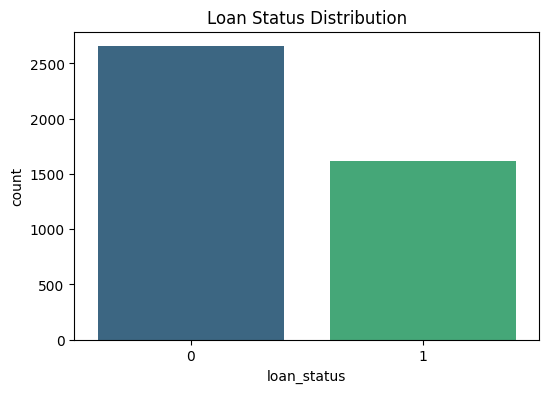

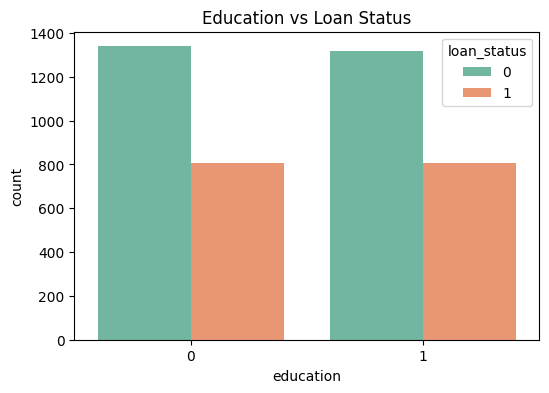

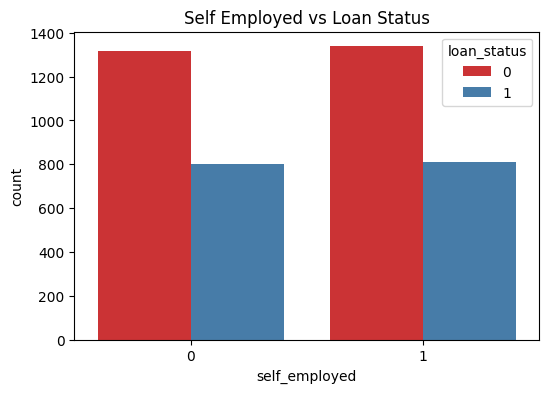

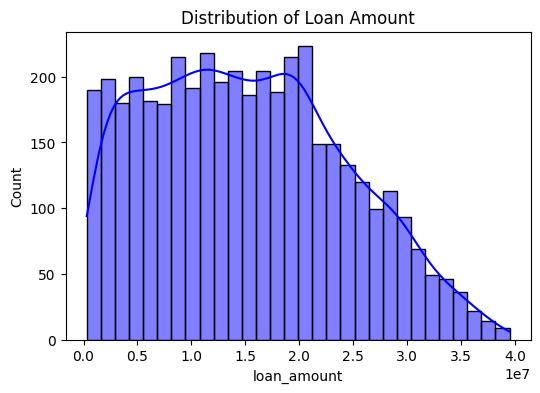

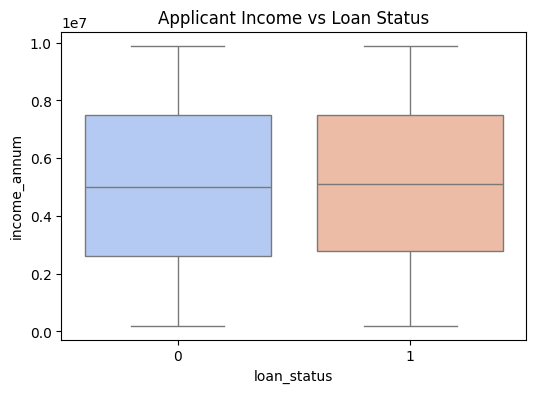

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
#target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(x='loan_status', data=df, palette='viridis')
plt.title("Loan Status Distribution")
plt.show()

#edu vs Loan Status
plt.figure(figsize=(6,4))
sns.countplot(x='education', hue='loan_status', data=df, palette='Set2')
plt.title("Education vs Loan Status")
plt.show()

#self Emp vs Loan Status
plt.figure(figsize=(6,4))
sns.countplot(x='self_employed', hue='loan_status', data=df, palette='Set1')
plt.title("Self Employed vs Loan Status")
plt.show()

#distribution of Loan Amount
plt.figure(figsize=(6,4))
sns.histplot(df['loan_amount'], kde=True, bins=30, color='blue')
plt.title("Distribution of Loan Amount")
plt.show()

#boxplot: Income vs Loan Status
plt.figure(figsize=(6,4))
sns.boxplot(x='loan_status', y='income_annum', data=df, palette='coolwarm')
plt.title("Applicant Income vs Loan Status")
plt.show()


In [39]:
#save the best model and encoders
best_model = lr_model if f1_score(y_test, y_pred_lr) > f1_score(y_test, y_pred_dt) else dt_model
joblib.dump(best_model, 'loan_model.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')
joblib.dump(le_target, 'target_encoder.pkl')
joblib.dump(X.columns.tolist(), 'feature_names.pkl')
print("Model saved successfully!")
print("\nTarget Encoder Classes:", le_target.classes_)
print("Class mapping:", {i: cls for i, cls in enumerate(le_target.classes_)})

Model saved successfully!

Target Encoder Classes: ['Approved' 'Rejected']
Class mapping: {0: 'Approved', 1: 'Rejected'}
